### 데이터 전처리

In [1]:
#MNIST 데이터셋은 70000개의 손글씨를 이용해 만든 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋
#MNIST 데이터는 케라스를 이용해 간단히 불러올 수 있다

In [2]:
from keras.datasets import mnist

In [3]:
#불러온 이미지 데이터를 X로, 이 이미지에 0~9까지 붙인 이름표를 Y_class로 구분하여 명명
#또한 70000개 중 학습에 사용될 부분은 train으로, 테스트에 사용될 부분은 test라는 이름으로 불러오자
#학습에 사용될 부분 : X_train, Y_class_train
#테스트에 사용될 부분 : X_test, Y_class_test

In [4]:
(X_train, Y_class_train),(X_test, Y_class_test) = mnist.load_data()

In [5]:
#케라스의 MNIST 데이터는 총 7만개의 이미지 중 6만개를 학습용으로, 1만개를 테스트용으로 미리 구분해 놓고 있다

In [6]:
print('학습셋 이미지 수 : %d 개' %(X_train.shape[0]))
print('테스트셋 이미지 수 : %d 개' %(X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [7]:
#불러온 이미지 중 한 개만 다시 불러와 보자
#이를 위해 matplotlib 라이브러리를 불러오고 imshow()함수를 이용해 이미지를 출력할 수 있다
#X_train에 저장되어 있으므로 X_train[0]을 통해 첫번째 이미지를, cmap = 'Greys' 옵션을 지정해 흑백으로 출력되게 한다

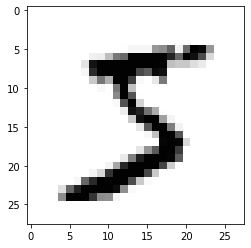

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [9]:
#이 이미지는 가로 28 세로 28 총 784개의 픽셀로 이루어져 있다. 
#각 픽셀은 밝기 정도에 따라 0부터 255까지의 등급을 매긴다
#흰색 배경이 0이라면 글씨가 들어간 곳은 1~255까지 숫자 중 하나로 채워져 긴 행렬로 이루어진 하나의 집합으로 변한다

In [10]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' %i)
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [11]:
#이미지는 다시 숫자의 집합으로 바뀌어 학습셋으로 사용된다
#앞서 배운 것과 마찬가지로 속성을 담은 데이터를 딥러닝에 집어넣고 클래스를 예측하는 문제로 전환
#28 X 28 = 784개의 속성을 이용해 0~9까지 10개 클래스 중 하나를 맞히는 문제가 된다
#주어진 가로28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔줘야한다
#reshape(총 샘플수, 1차원 속성의 수) 함수를 사용

In [12]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [13]:
#케라스는 데이터를 0에서 1사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보인다
#따라서 현재 0~255사이의 값으로 이루어진 값을 0~1 사이의 값으로 바꿔야 한다.
#바꾸는 방법은 각 값을 255로 나누는 것이다
#이렇게 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정을 데이터 정규화라고 한다
#현재 주어진 데이터 값은 0부터 255까지의 정수로, 정규화를 위해 255로 나누어 주려면 먼저 이 값을 실수형으로 바꿔야 한다
#astype() 함수를 이용해 실수로 바꿔준뒤 255로 나눈다

In [14]:
X_train = X_train.astype('float64')
X_train = X_train / 255

In [15]:
#X_test에도 마찬가지로 이 작업을 적용한다
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [16]:
#이제 숫자의 이름을 확인해 보자
#이미지를 보았을 때 숫자 5라는 것을 짐작할 수 있다
#실제로 이 숫자의 레이블이 어떤지를 불러오고자 Y_class_train[0]을 다음과 같이 출력해 보자

In [17]:
print('class : %d '%(Y_class_train[0]))

class : 5 


In [18]:
#이 숫자의 레이블 값인 5가 출력되는 것을 확인할 수 있다
#앞서서 아리리스의 품종을 예측할 때 딥러닝의 분류 문제를 해결하려면 원-핫 인코딩 방식을 적용해야 한다고 배웠다
#즉, 0~9까지의 정수형 값을 갖는 현재 형태에서 0또는 1로만 이루어진 벡터로 값을 수정해야 한다
#class [5]를 [0,0,0,0,0,1,0,0,0,0]로 바꿔야 한다
#이를 가능하게 해 주는 함수가 바로 np_utils.to_categorical()함수 이다.
#to_categorical(클래스, 클래스의 개수) 형식으로 지정

In [19]:
from keras.utils import np_utils

Y_train  = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [20]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
#이와 같이 원-핫 인코딩이 적용된 것을 확인할 수 있다

#### - 코드정리

In [22]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf

In [23]:
#seed값 설정
seed = 0
np.random.seed(3)
tf.random.set_seed(3)

In [24]:
#MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print('학습셋 이미지 수 : %d' %(X_train.shape[0]))
print('테스트셋 이미지 수 : %d' %(X_test.shape[0]))

학습셋 이미지 수 : 60000
테스트셋 이미지 수 : 10000


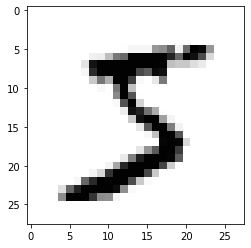

In [25]:
#그래프로 확인
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [26]:
#코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [27]:
#차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

In [28]:
#클래스 값 확인
print('class : %d' %(Y_class_train[0]))

class : 5


In [29]:
#바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [30]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
